In [17]:
import math

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(3)

## 1. ベイズの定理

$$
\begin{align*}
p(y|x) &= \frac{p(x|y)p(y)}{p(x)} \\
&= \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy} \tag{1} \\
p(y|x):& 事後確率(Posterior) \\
p(x|y):& 尤度(Likelihood) \\
p(y):& 事前確率(Prior) \\
\int p(x|y)p(y) dy:& 周辺尤度(Marginal Likelihood) \\
                   & or エビデンス(Evidence) \\
\end{align*}
$$

###  1.1. パラメータ推定手法

- 最尤推定(Maximum Liklihood, ML)
  - 尤度関数を最大化するパラメータを推定
  - $ \hat{y} = \argmax_{y}p(x|y) $
- MAP推定(Maximum A Posterior)
  - 事後確率を最大化するパラメータを推定
  - 周辺尤度は求めたい変数に対して定数なので右辺の分子を最大化させる
  - $ \hat{y} = \argmax_{y}[p(x|y)p(y)]$
- ベイズ推定
  - 事後確率をそのままパラメータとして計算
  - $p(y|x) = \frac{p(x|y)p(y)}{p(x)} $


### 1.2. 具体例

コインで表裏が出る確率を各推定手法で推定

<BarContainer object of 2 artists>

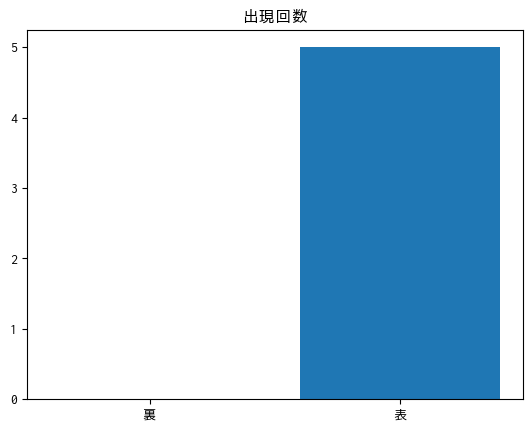

In [18]:
N = 5
K = 2
results = np.random.choice([1], N)
m = list(results).count(1)
counts = []
labels = ["裏", "表"]
for i in range(K):
    counts.append(list(results).count(i))
    pass

plt.title("出現回数")
plt.bar(labels, counts)

#### 1.2.1. 最尤推定

2種類の離散事象の確率分布なので尤度関数としてベルヌーイ分布を利用
$$
\begin{align*}
Bern(x|\mu) &= \mu^x(1-\mu)^{1-x}
\end{align*}
$$

$$
\mu: 表が出る確率, x: 表の場合1、裏の場合0
$$

$N$回コインを投げた場合の確率分布は下記になる

$$
p(x|\mu) = \prod_n \mu^{x_n}(1-\mu)^{1-x_n} \\
p(m|\mu) = \mu^{m}(1-\mu)^{N-m}
$$

$$
m: 表が出た回数
$$

計算を簡単にするために対数尤度を求める

$$
\log p(m|\mu) = m \log \mu + (N-m) \log (1-\mu))
$$

微分して0とおいた方程式を解くと最尤推定量が求まる

$$
\frac{\partial}{\partial \mu}\log p(m|\mu) = \frac{m}{\mu} - \frac{N-m}{1-\mu} \\
$$

推定値は下記になる

$$
\hat{\mu} = \frac{m}{N}
$$



<BarContainer object of 2 artists>

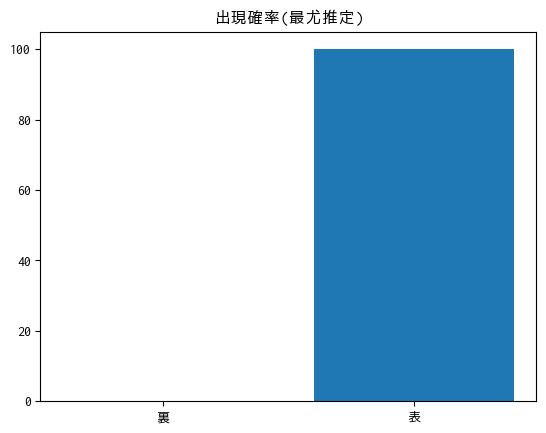

In [19]:
percents = []
for i in range(K):
    percents.append(list(results).count(i)/N*100)
    pass

plt.title("出現確率(最尤推定)")
plt.bar(labels, percents)

表裏が出る確率はそれぞれほぼ$1/2$なのにも関わらず裏は一度も出ていないので出現確率を0％と推定してしまう。  
(今後1億回コインを投げようが決して裏は出ない？)   
最尤推定はサンプルを過学習してしまう

#### 1.2.2. MAP推定

尤度関数がベルヌーイ分布の場合、事前分布なのでベータ分布を利用する  

$$
Beta(\mu|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}
$$

事後確率の$\mu$に関係する部分は下記となる

$$
p(\mu|m,a,b) = p(m|\mu)p(\mu|a,b) \propto \mu^{m+a-1}(1-\mu)^{N-m+b-1}
$$

計算を簡単にするために対数をとる

$$
\log p(\mu|m,a,b) = (m+a-1)\log \mu + (N-m+b-1) \log (1-\mu)
$$

微分して0とおいた方程式を解くと推定量を計算

$$
\begin{align*}
\frac{\partial}{\partial \mu}\log p(\mu|m,a,b) &= \frac{m+a-1}{\mu} - \frac{N-m+b-1}{1-\mu}
\end{align*}
$$

推定量は下記になる

$$
\hat{\mu} = \frac{m+a-1}{N+a+b-2}
$$

事前分布としてコインは表裏の出現回数はそれぞれほぼ等しくなるだろうという前提知識を利用  
例えば100回サイコロを降れば、それぞれ各50回づつ出るだろうという前提知識を利用

<BarContainer object of 2 artists>

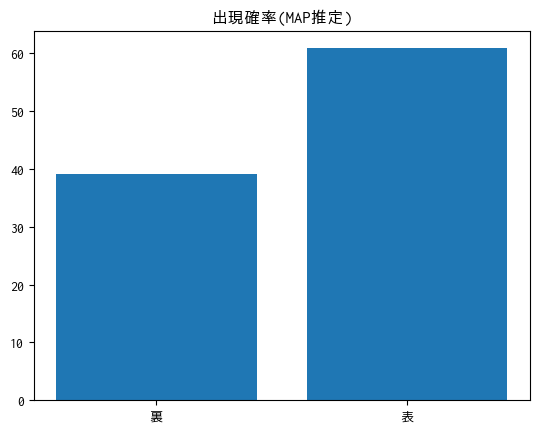

In [20]:
a = 10
b = 10
percents = []
for i in range(K):
    percents.append((list(results).count(i)+a-1)/(N+a+b-2) * 100)
    pass

plt.title("出現確率(MAP推定)")
plt.bar(labels, percents)

裏の出現回数が0でも前提知識の影響で出現率が0%にならない

#### 1.2.3. ベイズ推定

事後分布をそのまま計算する

$$
\begin{align*}
p(\mu|m)
&= \frac{p(m|\mu)Beta(\mu|a,b)}{p(m)} \\
&= \frac{\mu^{m}(1-\mu)^{N-m} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}}{p(m)} \\
&= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b) p(m)} \mu^{m+a-1}(1-\mu)^{N-m+b-1}
\end{align*}
$$

上記は確率分布であり積分して1にならないといけないので右辺の分数部分はベータ関数から見て下記になる

$$
p(\mu|m,a,b) = \frac{\Gamma(N+a+b)}{\Gamma(m+a)\Gamma(N-m+b)} \mu^{m+a-1}(1-\mu)^{N-m+b-1}
$$

上記のように事前分布と事後分布でパラメータが変わっただけで同種の確率分布になる事前分布のことを共役事前分布と言います。  
ベイズ統計において計算が非常に簡略化可能なため尤度関数に合わせて事前分布は共役事前分布を利用することが望まれます。

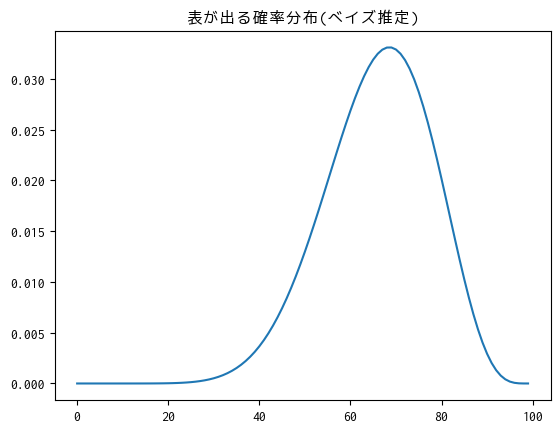

In [21]:
a = 5
b = 5
mu = np.linspace(0,1,100)
p = np.power(mu, m+a-1) * np.power(1-mu, N-m+b-1)
p = p / np.sum(p)
plt.title("表が出る確率分布(ベイズ推定)")
plt.plot(p)

ベイズ推定ではサンプル数によって推定精度の幅が変化する

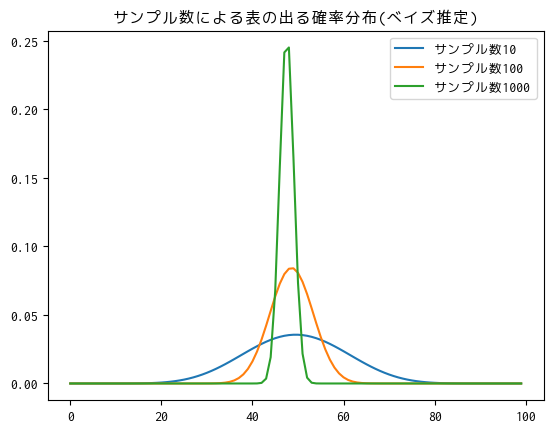

In [22]:
Ns = [10, 100, 1000]

fig, ax = plt.subplots()
ax.set_title("サンプル数による表の出る確率分布(ベイズ推定)")

for n in Ns:
    m = list(np.random.choice([0,1], n)).count(1)
    p = np.power(mu, m+a-1) * np.power(1-mu, n-m+b-1)
    p = p / np.sum(p)
    ax.plot(p, label=f"サンプル数{n}")
    pass
ax.legend()
plt.show()